In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

## Utilize GPUs

In [30]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8434240237218707000,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11000905728
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14896714155916300689
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:06:00.0, compute capability: 8.6"]

In [31]:
vocab_size = 10000                                    # Maximum word numbers in our dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
print(f"training data size = {len(X_train)}")
print(f"test data size = {len(X_test)}")

num_classes = max(y_train) + 1
print(f"num_class = {num_classes}")

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


training data size = 25000
test data size = 25000
num_class = 2


C:\Users\PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Mean len = 238.71364, 2-sigma len = 407.0


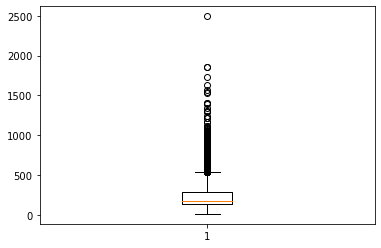

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [32]:
len_review = [len(r) for r in X_train]
len_2sig = np.quantile(len_review, 0.865)
print(f"Mean len = {np.mean(len_review)}, 2-sigma len = {len_2sig}")  # 2-sigma length cover
plt.boxplot(len_review);plt.show()

print(X_train[0])  # Embedded words. low number means high frequency, 0,1,2,3 == specialized tokens. 
word2idx = imdb.get_word_index()
idx2word = {}
for key, val in word2idx.items():
    idx2word[val+3] = key         # value+3 = real mapping integer

In [33]:
print(f"most frequent : {idx2word[4]}")
print(f"least frequent : {idx2word[max(idx2word.keys())]}")
print(max(idx2word.keys()))
# An example of how the IMDB data looks like
for idx, token in enumerate (["<pad>", "<sos>", "<unk>"]):
    idx2word[idx] = token
print(' '.join([idx2word[idx] for idx in X_train[10]]))

most frequent : the
least frequent : 'l'
88587
<sos> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <unk> romance <unk> on to the scene <unk> <unk> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <unk> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <unk> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <unk> sent to prison for fraud he is put in a cell with three others the quietly insane <unk> body building <unk> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <unk> after <unk> part of it they soon realise its magical p

In [34]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

l_max = int(len_2sig) ; print(l_max)
X_train = pad_sequences(X_train, maxlen = l_max)
X_test = pad_sequences(X_test, maxlen = l_max)       # Now all of the reviews are set in len_2sig

407


In [35]:
#------ The bahdanau attention ------#
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()  
        # super(The current class name, self). super : execute tf.keras.Model.__init__()
        self.W1 = Dense(units)
        self.W2 = Dense(units)     
        self.V = Dense(1)          # With no activation specification, act = linear
    def call(self, val, query):
        # query : dim = N*h (N = batch, h = hidden size)
        h_t = tf.expand_dims(query, 1)
        # Decoder hidden(t). expand dims in axis = 1
        
        # Attn score : dim = N*h*1(h : )
        score = self.V(tf.nn.tanh(self.W1(val) + self.W2(h_t)))
        # Dense(units) : output = dim(N, units). So this works as a weight matrix. 
        
        # Attn weights : dim = N*d_model*1
        weight = tf.nn.softmax(score, axis = 1) # d_model direction calc.
        
        # Context vec, N*()
        weighted_vec = weight*val            
        weighted_vec = tf.reduce_sum(weighted_vec, axis = 1)
        
        return weighted_vec, weight

In [36]:
#------ The BiLSTM layer ------#
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [37]:
seq_ipt = Input(shape = (l_max,), dtype = 'int32')
embedded_seq = Embedding(vocab_size, 64, input_length = l_max, mask_zero = True)(seq_ipt)
# 16384 wores -> 128dim embedding
# mask_zero = True : mask layers with zeros(<--확인해볼것!)

# 1st layer, N_cells = 64
Bilstm = Bidirectional(LSTM(64, dropout = 0.5, return_sequences = True))(embedded_seq)
# Check dims
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
  (LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(Bilstm)
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 407, 128) (None, 64) (None, 64) (None, 64) (None, 64)


**Input shape :** N(batch), 462?(max_l = **Timesteps**), 96(word embed = **input dim**)<br>
hidden, cell dim = 64

In [38]:
# Concatenate each fwd / bwd state
hidden_ = Concatenate()([forward_h, backward_h])
cell_   = Concatenate()([forward_c, backward_c])
# Attn, with units = hidden dim
Attn = BahdanauAttention(64)
context_vector, attention_weights = Attn(lstm, hidden_)

dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="sigmoid")(dropout)
model = Model(inputs=seq_ipt, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs = 2, batch_size = 256, \
                    validation_data=(X_test, y_test), verbose=1)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 407)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 407, 64)      640000      input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 407, 128)     66048       embedding_2[0][0]                
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) [(None, 407, 128), ( 98816       bidirectional_5[0][0]            
____________________________________________________________________________________________

In [40]:
print("Accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 466s 596ms/step - loss: 0.2858 - accuracy: 0.8801
Accuracy : 0.8801


## Useful tips : <br>
**1. .join // https://blockdmask.tistory.com/468<br>**
<code>'_'.join(['a', 'small', 'example'])
</code>
returns "a_small_example"<br><br>
**2. tf to_categorical(x, num_classes = n)**<br>
returns one-hot encoded n classes in n dimension<br><br>
**3. tf pad_sequence(X, )**<br>
basically pad to the largest dimension of the data<br><br>
**4. tf.expand_dims?**<br>
transpose를 해서 (Batch)X(size,) -> (Batch)X(1,size)로 맞추기 위해 <br>
**5. LSTM outputs**<br>
lstm = LSTM(n_units, return_seq = False, return_st = False)(input) : returns only the last hidden st<br>
return_seq = False, return_st = True : last hidden st, last hidden st, last cell st<br>
return_seq = True, return_st = True : All sequence hidden st, last hidden st, last cell st<br>
https://simpling.tistory.com/19

In [ ]:
test_bi, fwd_h, fwd_c, bwd_h, bwd_c =\
Bidirectional(LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(embedded_seq)
print(test_bi.shape, fwd_h.shape, fwd_c.shape, bwd_h.shape, bwd_c.shape)

test_single, h, c = LSTM(64, dropout=0.5, return_sequences=True, return_state=True)(embedded_seq)
print(test_single.shape, h.shape, c.shape)

**6. layers.Dense()**<br>


In [ ]:
A = np.random.random((3,4,5));print(A)
test_ipt = Input(shape = (A.shape), dtype = 'float32')
dense_test = Dense(10,activation = 'relu')(test_ipt)
dense_test_ = Dense(1)(dense_test)
model_test = Model(inputs = test_ipt, outputs = dense_test_)
model_test.summary()

Suppose that the Input(X) shape  =  (a,b,c), Dense layer = Dense(d).<br>
Then W = (c, d), where WX = np.tensordot(X, W, [-1], [0]). Hence contracting through the **last axis of the input** and **the first axis of W(weight mtx or the Kernel of the layer)**